## Handling Missing Value - By Mean & Median 
    Handling missing values by Mean and Median imputation involves replacing the missing data points in a feature (column) with the calculated mean or median of the non-missing values for that specific feature. This is a form of univariate imputation.
    
    - Mean 
      The Mean (often called the average) is the sum of all values in a data set divided by the total number of values. 
      It acts as the balance point of the data. 
    
    - Median
      The Median is the middle value in a data set when the values are arranged in ascending or descending order. 
      It divides the data into two equal halves, with 50% of the observations falling below it and 50% falling above it.
    
    - Use for
      Numerical Data : It is only suitable for numerical variables.
      Normal Distribution : It works best when the data is approximately normally distributed and has few or no outliers 

    - Advantages
      - Simple and fast, Maintains dataset size
      - Works well for small missing proportions  

    - Disadvantages
      - Reduces variance
      - Breaks correlations between variables
  

### Import Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

### Load titanic dataset

In [23]:
data = pd.read_csv("titanic_toy.csv")
data.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


### Get complete imformation about dataset

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Check for null values

In [29]:
print(data.isnull().mean()*100)

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64


### Spliting X and y into train and test 

In [32]:
X = data.drop(columns=['Survived'],axis = 1)
y = data['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [332]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

### Filling NaN values of Age and Fare Column by Mean & Median

In [34]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

In [36]:
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

### Variance Comparision For Age , Age_mean and Age_median

In [341]:
print("Origial Age variable variance ::",X_train['Age'].var())
print("Mean Age variable variance ::",X_train['Age_mean'].var())
print("Median Age variable variance ::",X_train['Age_median'].var())

Origial Age variable variance :: 210.2517072477438
Mean Age variable variance :: 168.8519336687225
Median Age variable variance :: 169.20731007048096


### Variance Comparision For Fare , Fare_mean and Fare_median

In [342]:
print("Origial Fare variable variance ::",X_train['Fare'].var())
print("Mean Fare variable variance ::",X_train['Fare_mean'].var())
print("Median Fare variable variance ::",X_train['Fare_median'].var())

Origial Fare variable variance :: 2761.031434948639
Mean Fare variable variance :: 2621.2323749512393
Median Fare variable variance :: 2637.01248167777


### Distribution for [ Age, Age_mean, and Age_median ] and [ Fare, Fare_mean, and Fare_median ]

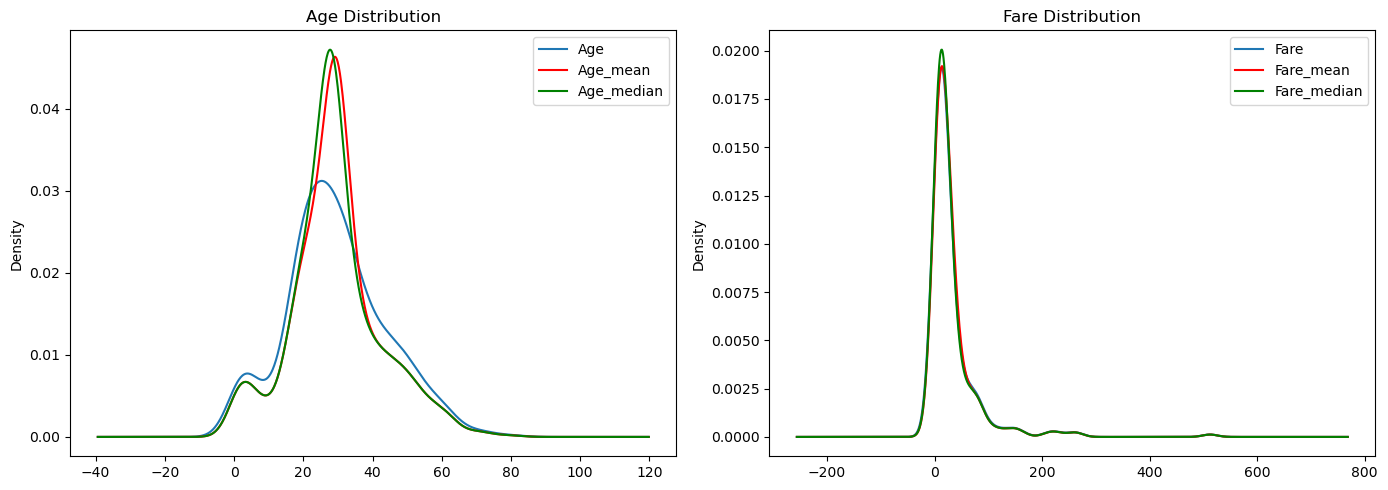

In [44]:
plt.figure(figsize=(14, 5))

# ---- First subplot: Age ----
plt.subplot(1, 2, 1)
X_train['Age'].plot(kind='kde', label='Age')
X_train['Age_mean'].plot(kind='kde', color='red', label='Age_mean')
X_train['Age_median'].plot(kind='kde', color='green', label='Age_median')
plt.legend(loc='best')
plt.title('Age Distribution')

# ---- Second subplot: Fare ----
plt.subplot(1, 2, 2)
X_train['Fare'].plot(kind='kde', label='Fare')
X_train['Fare_mean'].plot(kind='kde', color='red', label='Fare_mean')
X_train['Fare_median'].plot(kind='kde', color='green', label='Fare_median')
plt.legend(loc='best')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


#### X_train Co - Variance 

In [348]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


#### X_train Co - Relation 

In [349]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


### Spread and Outlier for Age and Fare

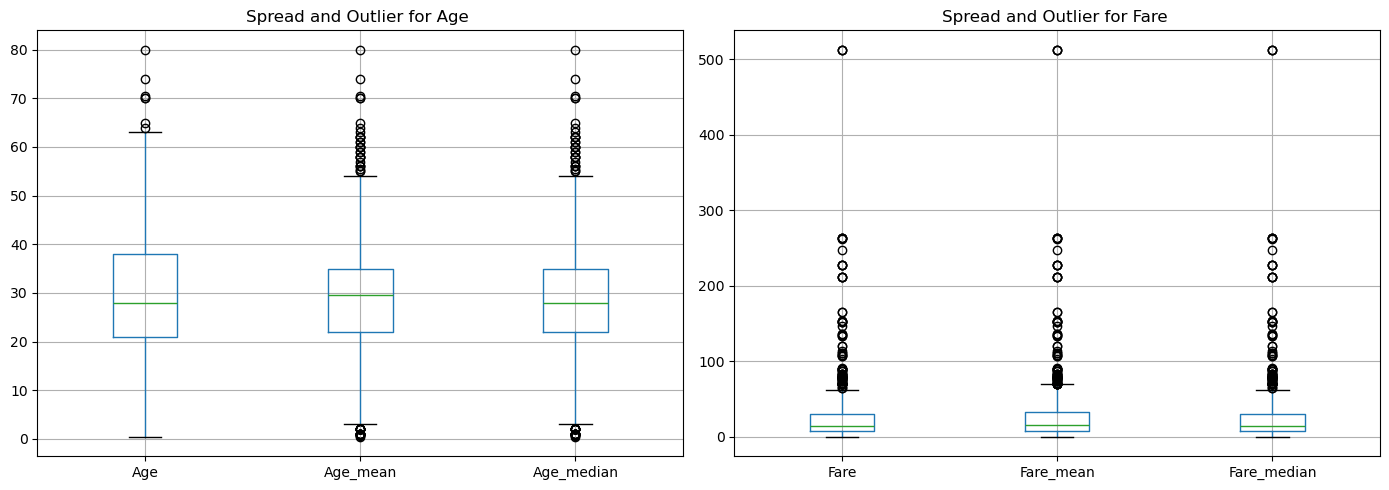

In [47]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_train[['Age','Age_mean','Age_median']].boxplot()
plt.title("Spread and Outlier for Age ")

plt.subplot(1,2,2)
X_train[['Fare','Fare_mean','Fare_median']].boxplot()
plt.title("Spread and Outlier for Fare ")
plt.tight_layout()
plt.show()

#### Using Sklearn SimpleImputer()

In [51]:
X = data.drop(columns=['Survived'],axis = 1)
y = data['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### SimpleImputer

In [54]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [56]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
    ],remainder='passthrough')

In [62]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [64]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [66]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [68]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [70]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

In [76]:
X_train = pd.DataFrame(X_train,columns=['Age','Fare','Family'])
X_train.head()

,Age,Fare,Family
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0


### Distribution for Age and Fare

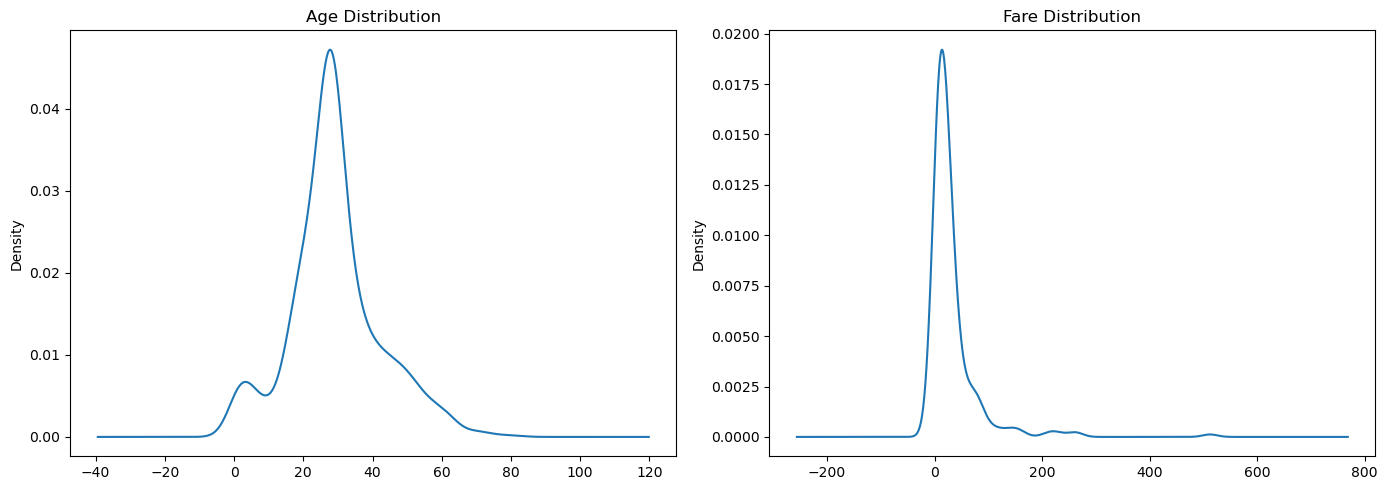

In [79]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_train['Age'].plot(kind='kde')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
X_train['Fare'].plot(kind='kde')
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()